In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
keras.__version__

'2.3.1'

In [3]:
data =  np.load('ORL_faces.npz')
data

In [4]:
files = [file for file in data.files]
files

['testY', 'testX', 'trainX', 'trainY']

In [5]:
X_train, y_train, X_test, y_test = data['trainX'], data['trainY'], data['testX'], data['testY']
print("Training: {}".format((X_train.shape,y_train.shape)))
print("Test: {}".format((X_test.shape,y_test.shape)))

Training: ((240, 10304), (240,))
Test: ((160, 10304), (160,))


In [6]:
len(np.unique(y_test))

20

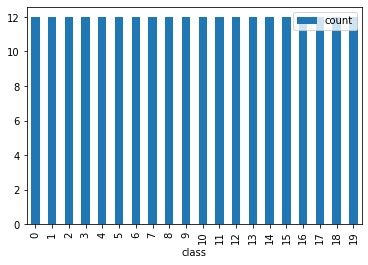

In [7]:
df = np.unique(y_train, return_counts=True)
df = pd.DataFrame({'class': df[0], 'count': df[1]})
df.plot(kind='bar', x='class', y=['count'])

In [8]:
df

,class,count
0,0,12
1,1,12
2,2,12
3,3,12
4,4,12
5,5,12
6,6,12
7,7,12
8,8,12
9,9,12


In [9]:
df_test = np.unique(y_test, return_counts=True)
df_test = pd.DataFrame({'class': df_test[0], 'count': df_test[1]})
df_test

,class,count
0,0,8
1,1,8
2,2,8
3,3,8
4,4,8
5,5,8
6,6,8
7,7,8
8,8,8
9,9,8


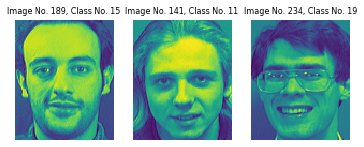

In [10]:
#Showing three sample images
samples = np.random.randint(low=0, high=len(X_train)-1, size=3)

fig, axs = plt.subplots(1,3)
for ax, sample in zip(axs,samples):
    ax.imshow(X_train[sample].reshape(112,92))
    ax.set_title('Image No. {}, Class No. {}'.format(sample, y_train[sample]), fontdict={'size': 8})
    ax.axis('off')

plt.show()

In [11]:
#Scaling Training and Test set between 0, 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
img_wt = 112
img_ht = 92

img_shape = (img_wt, img_ht, 1)

In [23]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense

In [24]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape=img_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(128, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(128)) 
model.add(Activation('relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(20)) 
model.add(Activation('softmax')) 

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 111, 91, 32)       160       
_________________________________________________________________
activation_6 (Activation)    (None, 111, 91, 32)       0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 55, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 54, 44, 64)        8256      
_________________________________________________________________
activation_7 (Activation)    (None, 54, 44, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 27, 22, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 21, 128)      

In [26]:
X_train = X_train.reshape(240,112,92,1)
X_test = X_test.reshape(160,112,92,1)

In [27]:
epochs = 25
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x=X_train, y=y_train, epochs=epochs, batch_size=16)

Epoch 1/25
240/240 [==============================] - 2s 7ms/step - loss: 3.0336 - accuracy: 0.0708
Epoch 2/25
240/240 [==============================] - 2s 7ms/step - loss: 2.9243 - accuracy: 0.1292
Epoch 3/25
240/240 [==============================] - 2s 7ms/step - loss: 2.3926 - accuracy: 0.3167
Epoch 4/25
240/240 [==============================] - 2s 7ms/step - loss: 1.2292 - accuracy: 0.6583
Epoch 5/25
240/240 [==============================] - 2s 7ms/step - loss: 0.5065 - accuracy: 0.8917
Epoch 6/25
240/240 [==============================] - 2s 7ms/step - loss: 0.3144 - accuracy: 0.9167
Epoch 7/25
240/240 [==============================] - 2s 7ms/step - loss: 0.2779 - accuracy: 0.8958
Epoch 8/25
240/240 [==============================] - 2s 7ms/step - loss: 0.1388 - accuracy: 0.9625
Epoch 9/25
240/240 [==============================] - 2s 7ms/step - loss: 0.0872 - accuracy: 0.9792
Epoch 10/25
240/240 [==============================] - 2s 7ms/step - loss: 0.0784 - accuracy: 0.9667

In [31]:
model.evaluate(x=X_test,y=y_test)

160/160 [==============================] - 0s 1ms/step


[0.3676621675491333, 0.925000011920929]

In [37]:
X_new = X_test[0].reshape(1,112,92,1)
preds = model.predict(x=X_new)
preds.shape

(1, 20)

In [40]:
preds[0]

array([8.62432301e-01, 4.14189592e-04, 2.35818447e-06, 7.59163242e-07,
       1.08482894e-07, 1.00008629e-05, 2.79343286e-08, 1.75619225e-05,
       1.23812049e-06, 3.67311009e-06, 1.88749327e-05, 8.03931980e-05,
       1.65756734e-04, 1.61725780e-04, 6.49976282e-05, 8.95757228e-02,
       4.26288648e-03, 9.69306143e-07, 4.05704603e-02, 2.21610512e-03],
      dtype=float32)